## 1.Environment Setup & Imports
Run this first to install necessary libraries, mount your Google Drive, and import packages.

In [1]:
# === 1.1 Install Dependencies ===
!pip install numpy==1.26.4
!pip install scikit-surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 847.5 kB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 976.2 kB/s eta 0:00:0000:0100:01
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.4
    Uninstalling numpy-1.24.4:
      Successfully uninstalled numpy-1.24.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
numba 0.57.1 requires numpy<1.25,>=1.21, but you have numpy 1.26.4 which is incompatible.


In [2]:
# === 1.2 Mount Google Drive ===
from google.colab import drive
import os

drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google.colab'

In [ ]:
# === 1.3 Import Libraries ===
import pandas as pd
import numpy as np
from surprise import Dataset, Reader, KNNBasic
from surprise.model_selection import train_test_split

# Define path
data_path = '/content/drive/MyDrive/Research/convert_grade_number_for_test_full.csv'

# Change directory to data folder
target_dir = '/content/drive/MyDrive/Research'
if os.path.exists(target_dir):
    os.chdir(target_dir)
    print(f"Current working directory: {os.getcwd()}")
else:
    print(f"Directory not found: {target_dir}")

Current working directory: /content/drive/MyDrive/Research


In [ ]:
print('Dataset : ', Dataset)

df = pd.read_csv("/content/drive/MyDrive/Research/convert_grade_number_for_test_full.csv")
df.head()

Dataset :  <class 'surprise.dataset.Dataset'>


/tmp/ipython-input-2756011614.py:3: DtypeWarning: Columns (7,12,20,35,40,41,43,58,70,79,113,117,118) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/drive/MyDrive/Research/convert_grade_number_for_test_full.csv")


,cohort,acad_year,term,year_level,room,student_id,GEN223 DISASTER PREPAREDNESS,INT102 WEB TECHNOLOGY,INT20101 JAVASCRIPT PROGRAMMING,INT203 CLIENT-SIDE WEB PROGRAMMING II,...,INT491 SPECIAL TOPICS I : MULTIMEDIA TECHNOLOGY,INT492 SPECIAL TOPICS II : BUSINESS FINANCE AND DATA ANALYTICS,INT492 SPECIAL TOPICS II : DEVSECOPS,GEN354 DIGITAL PRODUCT INNOVATION AND COMMERCIALIZATION,INT530 SELECTED TOPICS IN INFRASTRUCTURE : INTERNET SECURITY (HANDS-ON APPROACH),INT540 SELECTED TOPICS IN INFORMATION TECHNOLOGY : DECISION SUPPORT SYSTEMS,LNG323 ENGLISH FOR DIGITAL SERVICE INNOVATION,SSC263 DEVELOPING LEADERS,INT420 BIG DATA ANALYTICS,INT491 SPECIAL TOPICS I : APPLIED COMPUTER VISION
0,66,2567,2,3,A,A375,0.0,0,0.0,2.5,...,0.0,0.0,0,0.0,0.0,0,0.0,0,0.0,0.0
1,66,2567,2,3,A,A335,0.0,0,0.0,3.0,...,0.0,0.0,0,0.0,0.0,0,0.0,0,0.0,0.0
2,66,2567,2,3,A,A381,0.0,0,0.0,2.0,...,0.0,0.0,0,0.0,0.0,0,0.0,0,0.0,0.0
3,66,2567,2,3,A,A286,0.0,0,0.0,2.0,...,0.0,0.0,0,0.0,0.0,0,0.0,0,0.0,0.0
4,66,2567,2,3,A,A515,0.0,0,2.5,2.5,...,0.0,0.0,0,0.0,0.0,0,0.0,0,0.0,0.0


In [ ]:
data_path

'/content/drive/MyDrive/Research/convert_grade_number_for_test_full.csv'

## 2.Data Loading & Preprocessing
This section handles reading the CSV, transforming it from "Wide" to "Long" format, cleaning invalid grades, and filtering specifically for 'INT' courses.

In [ ]:
df = pd.read_csv(data_path, low_memory = False)

id_vars = ['student_id']
df_long = pd.melt(df, id_vars=['student_id'], var_name='course', value_name='grade')

df_long['grade'] = pd.to_numeric(df_long['grade'], errors='coerce')
df_long_cleaned = df_long[(df_long['grade'] > 0.0) & (df_long['grade'].notna())].copy()

df_long_filtered = df_long_cleaned[df_long_cleaned['course'].astype(str).str.startswith('INT')].copy()

print(f"--- Data Preparation Complete ---")
print(f"Total records after cleaning: {len(df_long_cleaned)}")
print(f"Filtered to INT courses only: {len(df_long_filtered)}")
df_long_filtered.head(5)

# df_long.rename(columns={"รหัส": "user_id"}, inplace=True)
# df_long.head()



--- Data Preparation Complete ---
Total records after cleaning: 43104
Filtered to INT courses only: 17468


,student_id,course,grade
25871,A246,INT102 WEB TECHNOLOGY,1.5
27143,A632,INT102 WEB TECHNOLOGY,3.0
27144,A086,INT102 WEB TECHNOLOGY,4.0
27145,A662,INT102 WEB TECHNOLOGY,4.0
27146,A066,INT102 WEB TECHNOLOGY,2.5


In [ ]:
# Check if file exists
if not os.path.exists(data_path):
    print(f"Error: The file '{data_path}' was not found.")
else:
    print("File found. Loading data...")

    # === 2.1 Load Data ===
    df = pd.read_csv(data_path, low_memory = False)

    # === 2.2 Transform Data (Wide to Long) ===
    id_vars = ['student_id']
    df_long = pd.melt(df, id_vars=id_vars, var_name='course', value_name='grade')

    # === 2.3 Clean Data ===
    # Convert grade to numeric and remove invalid/empty grades
    df_long['grade'] = pd.to_numeric(df_long['grade'], errors='coerce')
    df_long_cleaned = df_long[(df_long['grade'] > 0.0) & (df_long['grade'].notna())].copy()

    # === 2.4 Filter for 'INT' Courses Only ===
    # This ensures the model only learns from INT courses
    df_long_filtered = df_long_cleaned[df_long_cleaned['course'].astype(str).str.startswith('INT')].copy()

    print(f"--- Data Preparation Complete ---")
    print(f"Total records after cleaning: {len(df_long_cleaned)}")
    print(f"Filtered to INT courses only: {len(df_long_filtered)}")
    display(df_long_filtered)


File found. Loading data...
--- Data Preparation Complete ---
Total records after cleaning: 43104
Filtered to INT courses only: 17468


,student_id,course,grade
25871,A246,INT102 WEB TECHNOLOGY,1.5
27143,A632,INT102 WEB TECHNOLOGY,3.0
27144,A086,INT102 WEB TECHNOLOGY,4.0
27145,A662,INT102 WEB TECHNOLOGY,4.0
27146,A066,INT102 WEB TECHNOLOGY,2.5
...,...,...,...
592988,A385,INT491 SPECIAL TOPICS I : APPLIED COMPUTER VISION,3.5
592990,A424,INT491 SPECIAL TOPICS I : APPLIED COMPUTER VISION,2.5
593003,A111,INT491 SPECIAL TOPICS I : APPLIED COMPUTER VISION,2.5
593005,A627,INT491 SPECIAL TOPICS I : APPLIED COMPUTER VISION,2.5


## 3.Split Data to train and test set

In [ ]:
# === 3.1 Load Data into Surprise Dataset ===
# Define rating scale (assuming grades are 1.0 to 4.0)
reader = Reader(rating_scale=(1, 4))
data = Dataset.load_from_df(df_long_filtered[['student_id', 'course', 'grade']], reader)

# === 3.2 Split Data ===
trainset, testset = train_test_split(data, test_size=0.30, random_state=42)

## 4.Model Training
Here we convert the pandas DataFrame into a Surprise Dataset, split it into training/testing sets, and train the SVD algorithm.

In [ ]:


# === 3.3 Train the Model ===
print("--- Training KNN Model (User - User) ---")
sim_user = {
    "name": "cosine",
    "user_based": True
}

algo_user = KNNBasic(sim_options=sim_user)
algo_user.fit(trainset)
print("Training KNN Model (User - User) complete.")
print("-----------------------------------------------------")
print("--- Training KNN Model (Item - Item) ---")
sim_item = {
    "name": "cosine",
    "user_based": False
}

algo_item = KNNBasic(sim_options=sim_item)
algo_item.fit(trainset)
print("Training KNN Model (Item - Item) complete.")



--- Training KNN Model (User - User) ---
Computing the cosine similarity matrix...
Done computing similarity matrix.
Training KNN Model (User - User) complete.
-----------------------------------------------------
--- Training KNN Model (Item - Item) ---
Computing the cosine similarity matrix...
Done computing similarity matrix.
Training KNN Model (Item - Item) complete.


In [ ]:
def recommend_for_user(algo, user_id, n=5):
    items = trainset.all_items()
    items_raw = [trainset.to_raw_iid(i) for i in items]

    predictions = [
        (iid, algo.predict(user_id, iid).est)
        for iid in items_raw
    ]

    predictions.sort(key=lambda x: x[1], reverse=True)
    return predictions[:n]

In [ ]:
def similar_items(algo, item_raw_id, k=5):
    inner = algo.trainset.to_inner_iid(item_raw_id)
    neighbors = algo.get_neighbors(inner, k=k)
    raw_ids = [algo.trainset.to_raw_iid(i) for i in neighbors]
    return raw_ids

In [ ]:
recommend_for_user(algo_user, "A246", n=10) # แนะนำวิชาให้ student_id = A246

[('INT540 SELECTED TOPICS IN INFORMATION TECHNOLOGY : DECISION SUPPORT SYSTEMS',
  4),
 ('INT492 SPECIAL TOPICS II : DEVSECOPS', 4),
 ('INT530 SELECTED TOPICS IN INFRASTRUCTURE : INTERNET SECURITY (HANDS-ON APPROACH)',
  4),
 ('INT221 INFORMATION TECHNOLOGY INTEGRATED PROJECT I', 3.824553555161312),
 ('INT540 SELECTED TOPIC IN INFORMATION TECHNOLOGY : DIGITAL STARTUP AND ENTREPRENEURSHIP',
  3.6250102967223237),
 ('INT362 RESEARCH PROJECT II', 3.6197210228433514),
 ('INT491 SPECIAL TOPICS I : APPLIED COMPUTER VISION', 3.575672735371057),
 ('INT521 SELECTED TOPIC IN DATA SCIENCE/DATA ENGINEERING : DATA VISUALIZATION',
  3.57470834294733),
 ('INT421 APPLIED MACHINE LEARNING', 3.5586272426905596),
 ('INT372 EXPERIENTIAL LEARNING PROJECT II', 3.512288312031859)]

In [ ]:
similar_items(algo_item, "INT102 WEB TECHNOLOGY") # วิชาที่คล้ายกัน

['INT492 SPECIAL TOPICS II : BLOCKCHAIN ENGINEERING',
 'INT491 SPECIAL TOPICS I : MULTIMEDIA TECHNOLOGY',
 'INT540 SELECTED TOPICS IN INFORMATION TECHNOLOGY : DECISION SUPPORT SYSTEMS',
 'INT492 SPECIAL TOPICS II : DEVSECOPS',
 'INT531 SELECTED TOPIC IN INFRASTRUCTURE : SMART NETWORKING AND INTELLIGENT INFRASTRUCTURE WORKSHOP']

## 5.Test and evaluate model

In [ ]:
from surprise import accuracy

# Predict on testset
pred_user = algo_user.test(testset)
pred_item = algo_item.test(testset)

# Evaluate
print("=== USER–USER KNN PERFORMANCE ===")
accuracy.rmse(pred_user)
accuracy.mae(pred_user)

print("\n=== ITEM–ITEM KNN PERFORMANCE ===")
accuracy.rmse(pred_item)
accuracy.mae(pred_item)

=== USER–USER KNN PERFORMANCE ===
RMSE: 0.6822
MAE:  0.5441

=== ITEM–ITEM KNN PERFORMANCE ===
RMSE: 0.7080
MAE:  0.5620


0.5619565720690679

In [ ]:
from surprise.model_selection import cross_validate

cross_validate(algo_user, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.6778  0.6913  0.6770  0.6745  0.6883  0.6818  0.0067  
MAE (testset)     0.5378  0.5503  0.5393  0.5352  0.5439  0.5413  0.0053  
Fit time          0.23    0.18    0.19    0.19    0.18    0.20    0.02    
Test time         0.94    0.97    0.98    0.96    0.97    0.96    0.02    


{'test_rmse': array([0.67776068, 0.69131415, 0.67701626, 0.67450877, 0.68833532]),
 'test_mae': array([0.5377626 , 0.55030758, 0.53933164, 0.53523008, 0.54390263]),
 'fit_time': (0.23157143592834473,
  0.1848466396331787,
  0.18590807914733887,
  0.19391584396362305,
  0.17926645278930664),
 'test_time': (0.9366905689239502,
  0.9690074920654297,
  0.9845681190490723,
  0.9564015865325928,
  0.974663257598877)}

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

def evaluate_classification(predictions, threshold=2):
    y_true = []
    y_pred = []

    for p in predictions:
        true_r = p.r_ui
        pred_r = p.est

        # Convert ratings → class
        y_true.append(1 if true_r >= threshold else 0)
        y_pred.append(1 if pred_r >= threshold else 0)

    metrics = {
        "R-score": np.corrcoef(y_true, y_pred)[0, 1],  # Correlation
        "Precision-Macro": precision_score(y_true, y_pred, average='macro'),
        "Recall-Macro": recall_score(y_true, y_pred, average='macro'),
        "F1-Macro": f1_score(y_true, y_pred, average='macro'),
        "Precision-Weighted": precision_score(y_true, y_pred, average='weighted'),
        "Recall-Weighted": recall_score(y_true, y_pred, average='weighted'),
        "F1-Weighted": f1_score(y_true, y_pred, average='weighted')
    }

    return metrics

In [ ]:
metrics_user = evaluate_classification(pred_user, threshold=3)
metrics_user

metrics_item = evaluate_classification(pred_item, threshold=3)
metrics_item

{'R-score': 0.39738233749814195,
 'Precision-Macro': 0.7057696328827492,
 'Recall-Macro': 0.6918562033950217,
 'F1-Macro': 0.6725834363683685,
 'Precision-Weighted': 0.7173348410992245,
 'Recall-Weighted': 0.6750620110665904,
 'F1-Weighted': 0.6695884919413505}

In [ ]:
from collections import defaultdict

# === 4.1 Predict for Unknown Items ===
print("--- Generating Predictions for all missing pairs ---")
anti_testset = trainset.build_anti_testset()
all_predictions = algo_user.test(anti_testset)

# === 4.2 Helper Function for Top-N ===
def get_top_n(predictions, n=5):
    """Return the top-N recommendation for each user from a set of predictions."""
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n

# === 4.3 Generate Top 5 Recommendations ===
top_n_recommendations = get_top_n(all_predictions, n=5)
print(f"Generated recommendations for {len(top_n_recommendations)} students.")

--- Generating Predictions for all missing pairs ---
Generated recommendations for 665 students.


In [ ]:
# =========================================================
# === Calculate Precision@K and Recall@K ===================
# =========================================================

from collections import defaultdict

# Build Ground Truth:
actual_courses_all = defaultdict(list)
actual_courses_B = defaultdict(list)

for uid, iid, true_r, est, _ in pred_user:
    actual_courses_all[uid].append(iid)

    if true_r >= 3.0:  # grade >= B
        actual_courses_B[uid].append(iid)


def precision_recall_at_k(top_n, actual_dict, K=5):
    precisions = []
    recalls = []

    for uid, user_recs in top_n.items():
        recommended_items = [iid for iid, _ in user_recs[:K]]
        actual_items = actual_dict.get(uid, [])

        if len(actual_items) == 0:
            continue

        true_positives = len(set(recommended_items) & set(actual_items))

        precision = true_positives / K
        recall = true_positives / len(actual_items)

        precisions.append(precision)
        recalls.append(recall)

    precision_avg = sum(precisions) / len(precisions)
    recall_avg = sum(recalls) / len(recalls)
    return precision_avg, recall_avg


# --------- Calculate results for K = 5 and 10 -----------
K_values = [5, 10]

print("\n====================== Precision & Recall ======================")

for K in K_values:
    precision_all, recall_all = precision_recall_at_k(top_n_recommendations, actual_courses_all, K)
    precision_B, recall_B = precision_recall_at_k(top_n_recommendations, actual_courses_B, K)

    print(f"\n========== K = {K} ==========")
    print("-- Using ALL enrolled courses --")
    print(f"Precision@{K}: {precision_all:.4f}")
    print(f"Recall@{K}: {recall_all:.4f}")

    print("\n-- Using ONLY courses with grade >= B --")
    print(f"Precision@{K}: {precision_B:.4f}")
    print(f"Recall@{K}: {recall_B:.4f}")

print("===================================================================")



====================== Precision & Recall ======================

========== K = 5 ==========
-- Using ALL enrolled courses --
Precision@5: 0.1814
Recall@5: 0.1092

-- Using ONLY courses with grade >= B --
Precision@5: 0.1923
Recall@5: 0.2053

========== K = 10 ==========
-- Using ALL enrolled courses --
Precision@10: 0.0907
Recall@10: 0.1092

-- Using ONLY courses with grade >= B --
Precision@10: 0.0961
Recall@10: 0.2053


--- Visualization of Recommendations ---


/tmp/ipython-input-1254798108.py:37: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


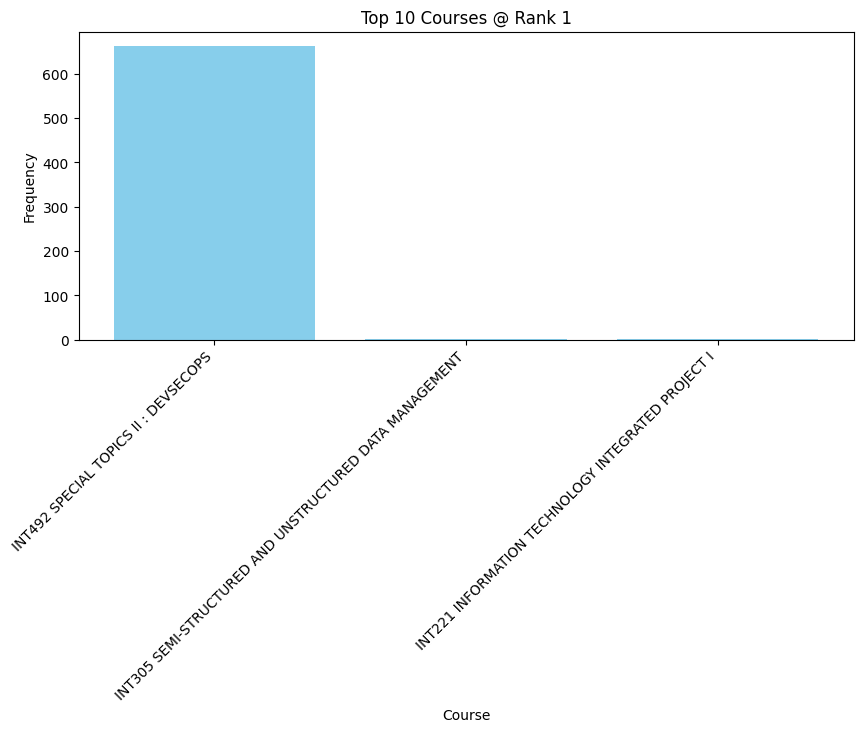

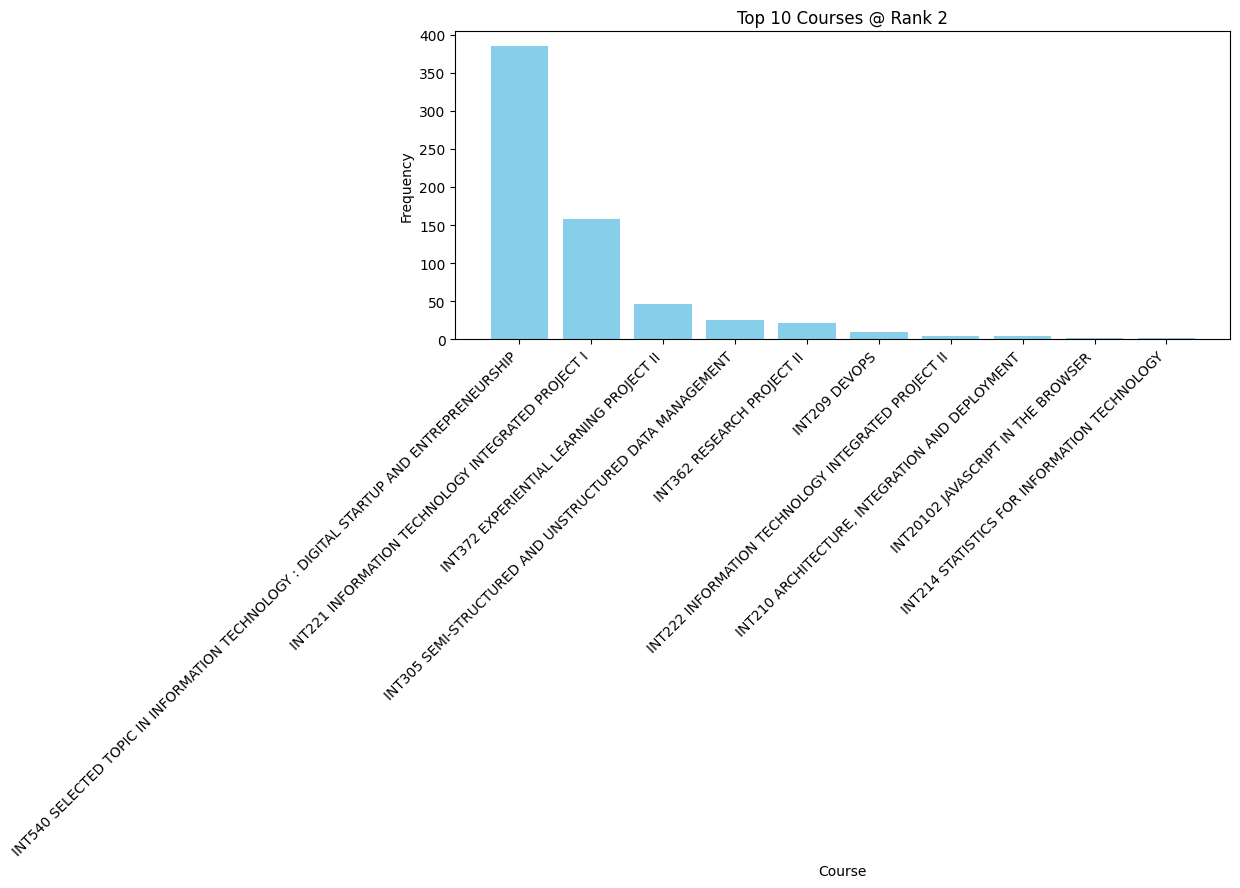

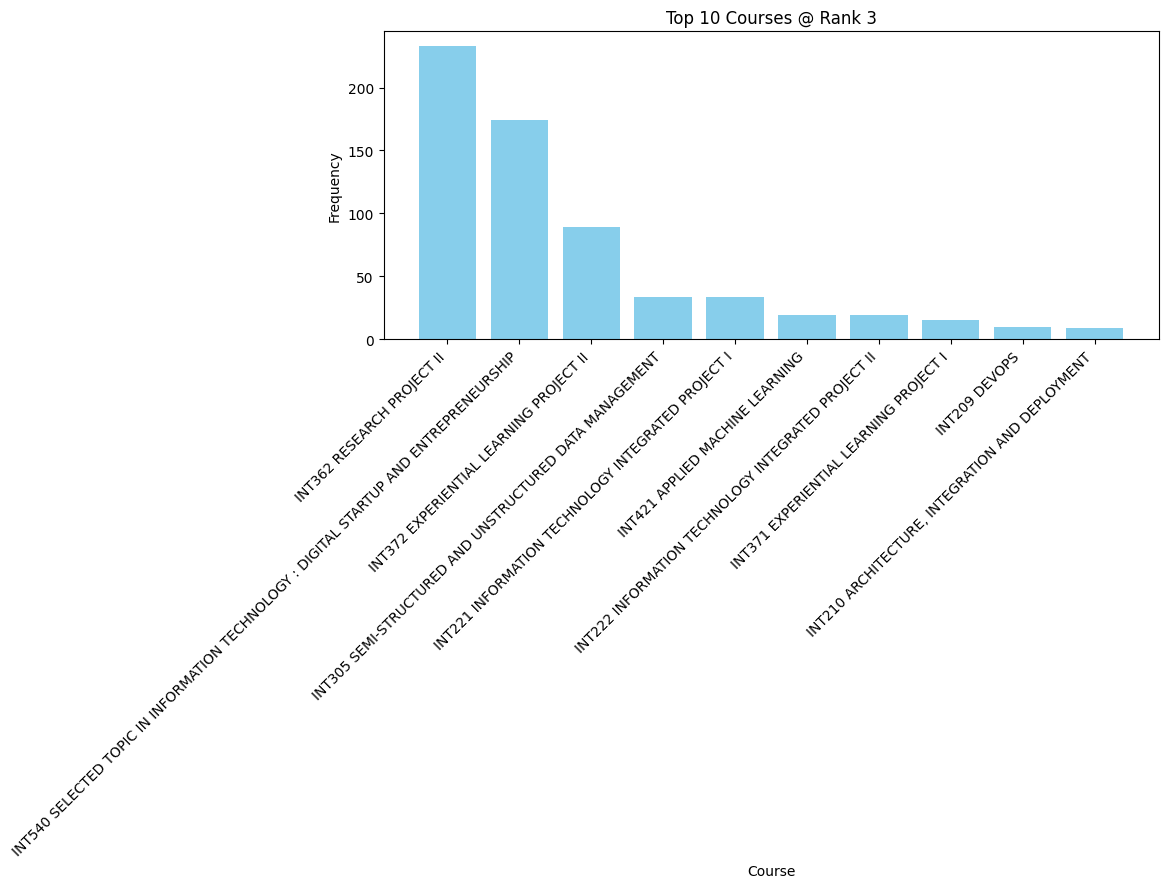

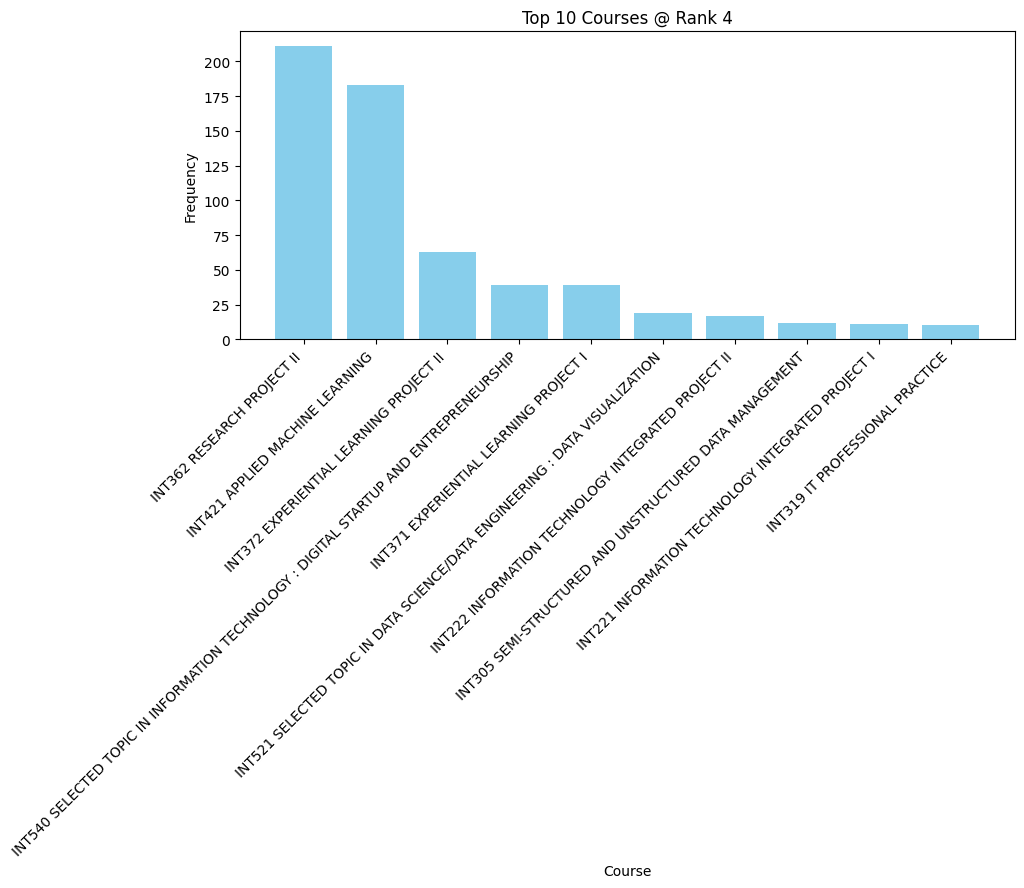

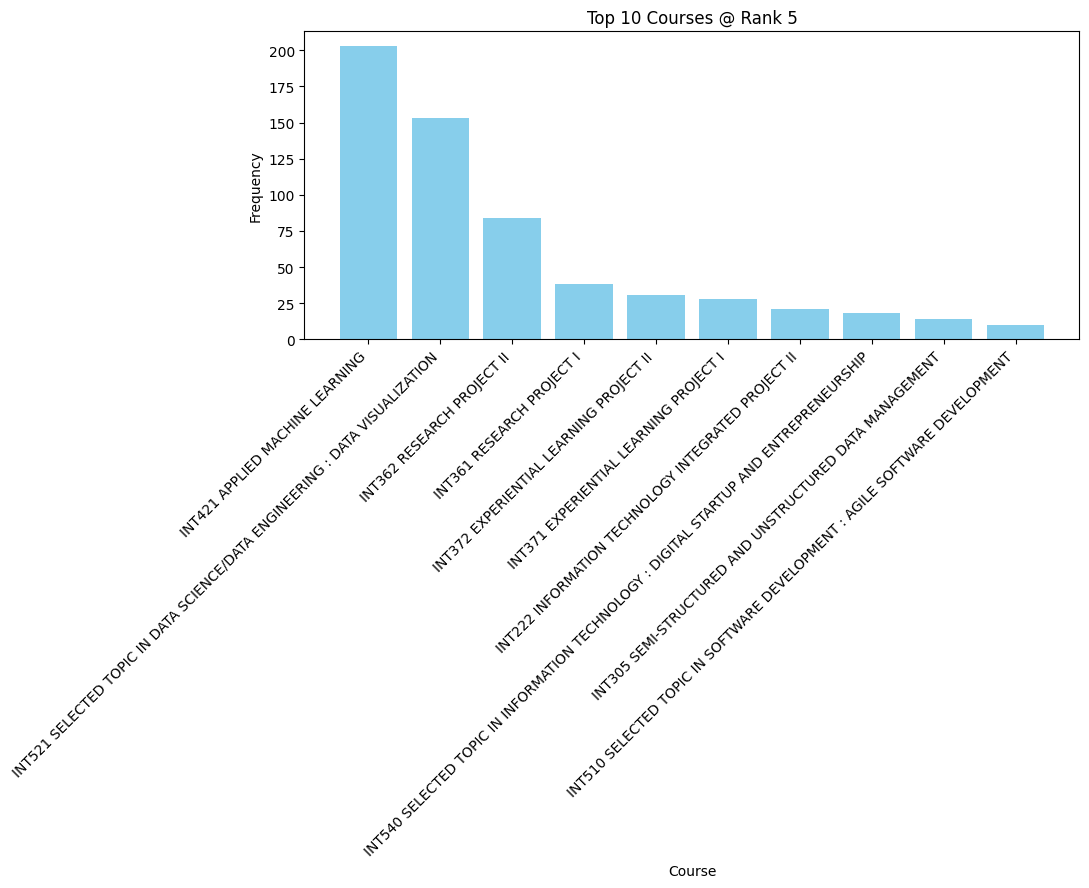


--- Final Recommendations Preview ---


,student_id,rank,course,predicted_grade
0,A378,1,INT492 SPECIAL TOPICS II : DEVSECOPS,4.000000
1,A378,2,INT540 SELECTED TOPIC IN INFORMATION TECHNOLOG...,3.703404
2,A378,3,INT362 RESEARCH PROJECT II,3.583558
3,A378,4,"INT210 ARCHITECTURE, INTEGRATION AND DEPLOYMENT",3.550297
4,A378,5,INT421 APPLIED MACHINE LEARNING,3.539097
5,A108,1,INT492 SPECIAL TOPICS II : DEVSECOPS,4.000000
6,A108,2,INT209 DEVOPS,3.750233
7,A108,3,INT20102 JAVASCRIPT IN THE BROWSER,3.699664
8,A108,4,INT540 SELECTED TOPIC IN INFORMATION TECHNOLOG...,3.679743
9,A108,5,INT371 EXPERIENTIAL LEARNING PROJECT I,3.587569


In [ ]:
from collections import defaultdict, Counter
import matplotlib.pyplot as plt

# === 5.1 Visualization Function ===
def visualize_topk_by_rank(top_n_recommendations, K=5, top_m=10):
    """
    Visualizes the frequency of recommended courses by rank.
    K: Number of recommendations per student.
    top_m: Number of top courses to show in the chart.
    """
    rows = []
    for student_id, recs in top_n_recommendations.items():
        for r, (course, score) in enumerate(recs[:K], start=1):
            rows.append({"rank": r, "course": course})

    if not rows:
        print("No recommendations to visualize.")
        return

    df_viz = pd.DataFrame(rows)
    rank_counters = {r: Counter(df_viz[df_viz["rank"] == r]["course"]) for r in range(1, K+1)}

    for r in range(1, K+1):
        counter = rank_counters[r]
        if not counter: continue

        most_common = counter.most_common(top_m)
        courses = [c for c, _ in most_common]
        counts  = [cnt for _, cnt in most_common]

        plt.figure(figsize=(10, 4))
        plt.bar(courses, counts, color='skyblue')
        plt.title(f"Top {top_m} Courses @ Rank {r}")
        plt.xlabel("Course")
        plt.ylabel("Frequency")
        plt.xticks(rotation=45, ha="right")
        plt.tight_layout()
        plt.show()

# === 5.2 Run Visualization ===
print("--- Visualization of Recommendations ---")
visualize_topk_by_rank(top_n_recommendations, K=5, top_m=10)

# === 5.3 Create Final DataFrame ===
rows = []
for student_id, recs in top_n_recommendations.items():
    for rank, (course, predicted_grade) in enumerate(recs, start=1):
        # Note: Data was filtered for INT in step 2, so this check is just a safeguard
        if isinstance(course, str) and course.startswith("INT"):
            rows.append({
                "student_id": student_id,
                "rank": rank,
                "course": course,
                "predicted_grade": predicted_grade
            })

df_recommendations = pd.DataFrame(rows)

print("\n--- Final Recommendations Preview ---")
display(df_recommendations.head(15))

## 6.Confusion Matrix

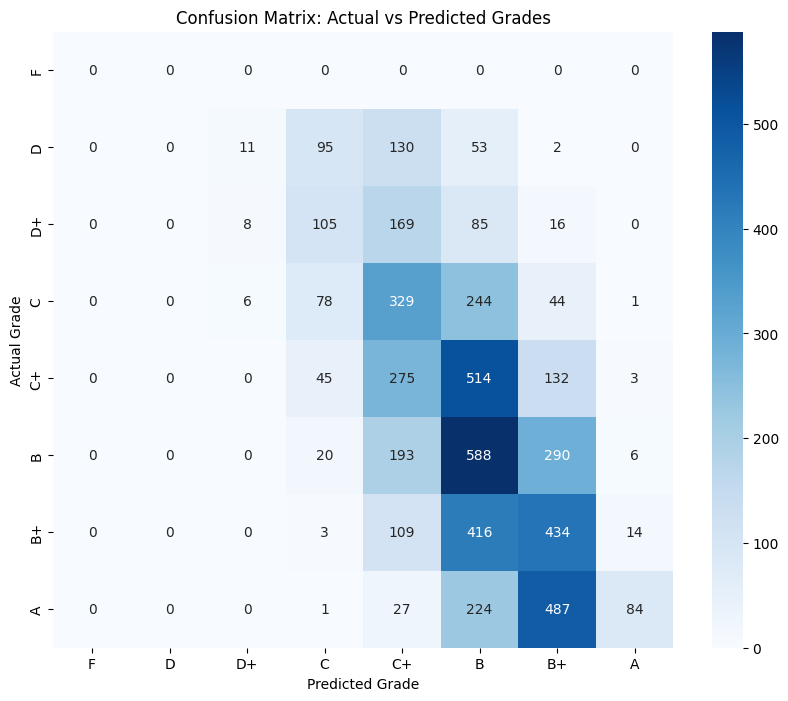


--- Detailed Classification Report ---
              precision    recall  f1-score   support

           F       0.00      0.00      0.00         0
           D       0.00      0.00      0.00       291
          D+       0.32      0.02      0.04       383
           C       0.22      0.11      0.15       702
          C+       0.22      0.28      0.25       969
           B       0.28      0.54      0.37      1097
          B+       0.31      0.44      0.36       976
           A       0.78      0.10      0.18       823

    accuracy                           0.28      5241
   macro avg       0.27      0.19      0.17      5241
weighted avg       0.33      0.28      0.24      5241



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# 1. Define Mapping: Score -> Letter
# ต้องเรียงลำดับจากน้อยไปมาก เพื่อให้ Matrix สวยงาม
score_to_letter = {
    0.0: 'F', 1.0: 'D', 1.5: 'D+', 2.0: 'C', 2.5: 'C+',
    3.0: 'B', 3.5: 'B+', 4.0: 'A'
}

# สร้าง list ของเกรดที่เป็นไปได้ (เอาไว้ระบุ Labels)
# กรองเอาเฉพาะที่มีใน map (เผื่อกรณีข้อมูลไม่มี F)
valid_scores = sorted(score_to_letter.keys())
valid_labels = [score_to_letter[s] for s in valid_scores]

# 2. Helper function: หาเกรดที่ใกล้ที่สุด
def get_nearest_grade_key(pred_score):
    # หา key (คะแนน) ที่ใกล้ที่สุด
    return min(valid_scores, key=lambda x: abs(x - pred_score))

# 3. Prepare Data
y_true_letters = []
y_pred_letters = []

for pred in pred_user:
    # 3.1 แปลง Actual Grade (r_ui) เป็น Letter
    # ใช้ get_nearest_grade_key เผื่อค่า r_ui มีทศนิยมเพี้ยนเล็กน้อย
    true_score_key = get_nearest_grade_key(pred.r_ui)
    y_true_letters.append(score_to_letter[true_score_key])

    # 3.2 แปลง Predicted Grade (est) เป็น Letter
    pred_score_key = get_nearest_grade_key(pred.est)
    y_pred_letters.append(score_to_letter[pred_score_key])

# 4. Generate Confusion Matrix
# สำคัญ: ต้องใส่ labels=valid_labels เพื่อบังคับลำดับ (D -> A)
cm = confusion_matrix(y_true_letters, y_pred_letters, labels=valid_labels)

# 5. Plot Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=valid_labels,
            yticklabels=valid_labels)

plt.title('Confusion Matrix: Actual vs Predicted Grades')
plt.xlabel('Predicted Grade')
plt.ylabel('Actual Grade')
plt.show()

# 6. Classification Report
print("\n--- Detailed Classification Report ---")
print(classification_report(y_true_letters, y_pred_letters, target_names=valid_labels, zero_division=0,labels=valid_labels))

In [ ]:
from sklearn.metrics import r2_score

y_true_raw = [pred.r_ui for pred in pred_user]
y_pred_raw = [pred.est for pred in pred_user]

# 2. คำนวณ R2 Score
r2 = r2_score(y_true_raw, y_pred_raw)

print(f"R2 Score: {r2:.4f}")

R2 Score: 0.3637


In [ ]:
from surprise.model_selection import GridSearchCV

# data = Dataset.load_from_df(df_long_filtered[['student_id', 'course', 'grade']], reader)

param_grid = {
    'k': [10, 20, 40],
    'sim_options': {
        'name': ['cosine', 'pearson', 'msd', 'euclidean'],
        'user_based': [True, False]
    }
}

gs = GridSearchCV(KNNBasic, param_grid, measures=['rmse', 'mae'], cv=5)
gs.fit(data)

print(gs.best_score['rmse'])
print(gs.best_params['rmse'])

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing

NameError: Wrong sim name euclidean. Allowed values are cosine, msd, pearson, pearson_baseline.

In [ ]:
from surprise import KNNBasic
from surprise import Dataset
from surprise.model_selection import GridSearchCV

# Parameter ที่ใช้ได้สำหรับ KNNBasic
param_grid = {
    'k': [20, 40, 60],
    'min_k': [1, 5],
    'sim_options': {
        'name': ['cosine', 'pearson'],
        'user_based': [True, False]   # True=User–User, False=Item–Item
    }
}

gs = GridSearchCV(
    KNNBasic,
    param_grid,
    measures=['rmse', 'mae'],
    cv=5,
    joblib_verbose=3
)

print("🚀 Start GridSearchCV (KNN)...")
gs.fit(data)
print("✅ GridSearchCV Finished")

print("\n🎯 Best RMSE:", gs.best_score['rmse'])
print("🏆 Best parameters:", gs.best_params['rmse'])


🚀 Start GridSearchCV (KNN)...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computin

[Parallel(n_jobs=1)]: Done  31 tasks      | elapsed:   23.6s


Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Com

[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:  1.5min finished


In [ ]:
param_grid = {
    'n_factors': [110, 120, 130],
    'n_epochs':  [80, 90, 100],
    'reg_pu':    [0.04, 0.06, 0.08], # Regularization สำหรับ user latent factors
    'reg_qi':    [0.04, 0.06, 0.08], # Regularization สำหรับ item latent factors
    'min_k': [1, 5],
    'sim_options': {
        'name': ['cosine', 'pearson', 'msd'],
        'user_based': [True, False]   # True=User–User, False=Item–Item
    }
}

gs = GridSearchCV(
    KNNBasic,
    param_grid,
    measures=['rmse', 'mae'],
    cv=5,    # fold cross-validation
    joblib_verbose=3
)

print("🚀 Start GridSearchCV (KNN)...")
gs.fit(data)
print("✅ GridSearchCV Finished")

🚀 Start GridSearchCV (KNN)...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computin

[Parallel(n_jobs=1)]: Done  31 tasks      | elapsed:   22.0s


Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computin

[Parallel(n_jobs=1)]: Done 127 tasks      | elapsed:  1.5min


Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Compu

[Parallel(n_jobs=1)]: Done 287 tasks      | elapsed:  3.4min


Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.


AttributeError: 'Parallel' object has no attribute '_pre_dispatch_amount'

Best RMSE score: 0.6804691235115853
Best params for RMSE:
{'k': 40, 'min_k': 5, 'sim_options': {'name': 'cosine', 'user_based': True}}

Best MAE score: 0.5410618457741553
Best params for MAE:
{'k': 40, 'min_k': 5, 'sim_options': {'name': 'cosine', 'user_based': True}}


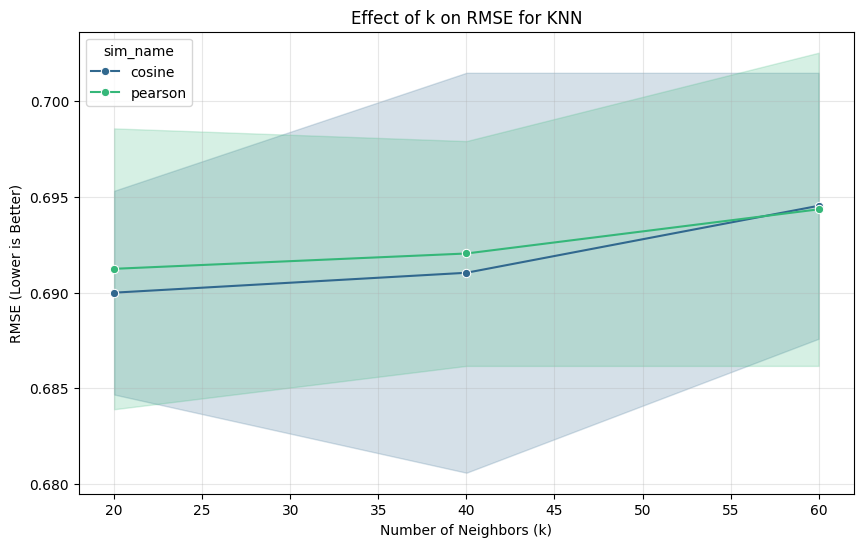

In [ ]:
import pandas as pd

# แปลงผลลัพธ์ทั้งหมดจาก Grid Search เป็น DataFrame
results_df = pd.DataFrame(gs.cv_results)

# แตก params dict ให้เป็นคอลัมน์
params_df = results_df['params'].apply(pd.Series)

# รวมเข้ากับ metric ที่สนใจ
df = pd.concat([
    params_df,
    results_df[['mean_test_rmse', 'mean_test_mae']]
], axis=1)

# แยกค่า name และ user_based ออกจาก sim_options
df['sim_name'] = df['sim_options'].apply(lambda x: x['name'])
df['user_based'] = df['sim_options'].apply(lambda x: x['user_based'])

print("Best RMSE score:", gs.best_score['rmse'])
print("Best params for RMSE:")
print(gs.best_params['rmse'])

print("\nBest MAE score:", gs.best_score['mae'])
print("Best params for MAE:")
print(gs.best_params['mae'])

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))

sns.lineplot(
    data=df,
    x='k',
    y='mean_test_rmse',
    hue='sim_name',
    marker='o',
    palette='viridis'
)

plt.title('Effect of k on RMSE for KNN')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('RMSE (Lower is Better)')
plt.grid(True, alpha=0.3)
plt.show()


In [ ]:
# 1. แปลงผลลัพธ์ทั้งหมดจาก Grid Search มาเป็น DataFrame เพื่อให้พลอตกราฟง่าย
results_df = pd.DataFrame.from_dict(gs.cv_results)

# -------------------------------------------------------
# Graph 1: Effect of Epochs (Learning Curve)
# ดูว่า "จำนวนรอบการเรียนรู้" ส่งผลต่อ Error อย่างไร
# -------------------------------------------------------
plt.figure(figsize=(10, 6))

# แกน X: จำนวน Epochs
# แกน Y: ค่า Error (RMSE)
# Hue (สีเส้น): แยกตามจำนวน Factors (ความซับซ้อนของโมเดล)
sns.lineplot(data=results_df, x='param_n_epochs', y='mean_test_rmse',
             hue='param_n_factors', marker='o', palette='viridis')

plt.title('Effect of Epochs on RMSE (Learning Curve)')
plt.xlabel('Number of Epochs')
plt.ylabel('RMSE (Lower is Better)')
plt.grid(True, alpha=0.3)
plt.show()

ValueError: Could not interpret value `param_n_epochs` for `x`. An entry with this name does not appear in `data`.

<Figure size 1000x600 with 0 Axes>

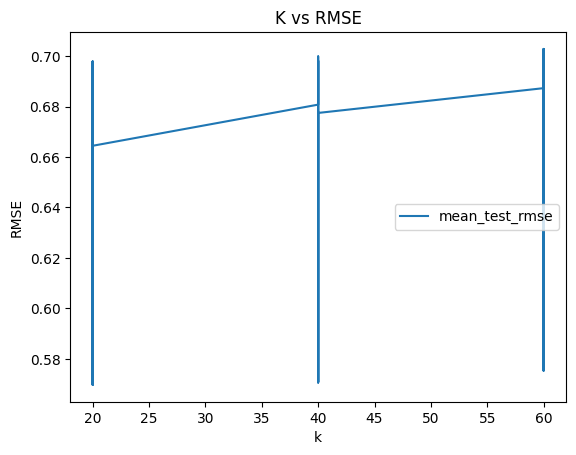

In [ ]:
import matplotlib.pyplot as plt

df.plot(x='k', y='mean_test_rmse')
plt.xlabel("k")
plt.ylabel("RMSE")
plt.title("K vs RMSE")
plt.show()


In [ ]:
# -------------------------------------------------------
# Graph 2: Heatmap (reg_pu vs reg_qi)
# ดูจุดที่ RMSE ต่ำที่สุดจากค่าคู่ของ regularization
# -------------------------------------------------------
pivot_table = results_df.pivot_table(
    values='mean_test_rmse',
    index='param_reg_pu',    # แกนตั้ง: reg_pu
    columns='param_reg_qi'   # แกนนอน: reg_qi
)

plt.figure(figsize=(8, 6))
sns.heatmap(
    pivot_table,
    annot=True,
    fmt='.4f',
    cmap='Blues_r'  # ยิ่งเข้ม = RMSE ยิ่งต่ำ (ดีกว่า)
)

plt.title('RMSE Heatmap (KNN)')
plt.xlabel('reg_qi (item regularization)')
plt.ylabel('reg_pu (user regularization)')
plt.show()

KeyError: 'param_reg_pu'

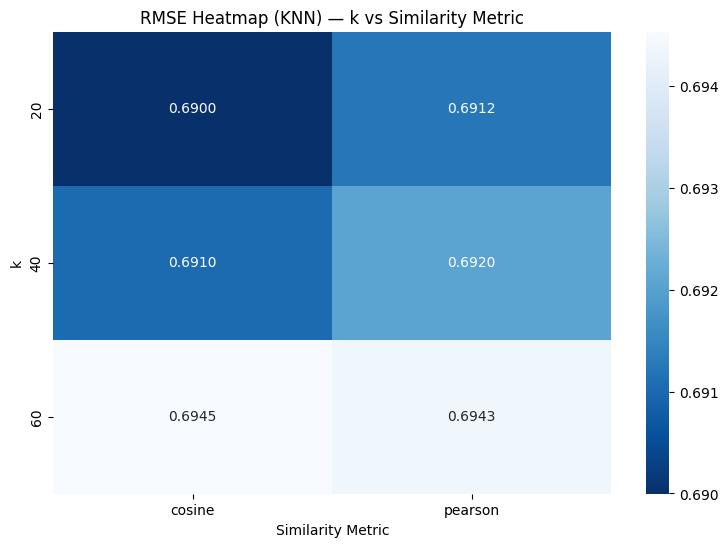

In [ ]:
# -------------------------------------------------------
# Graph: Heatmap (k vs similarity metric)
# -------------------------------------------------------

# แปลงผล GridSearch ให้อยู่ในรูป DataFrame
results_df = pd.DataFrame.from_dict(gs.cv_results)

# NOTE:
# param_sim_options เป็น dict ดังนั้นต้องแตกค่า metric ออกมาก่อน
results_df['metric'] = results_df['param_sim_options'].apply(lambda x: x['name'])

# ทำ pivot table
pivot_table = results_df.pivot_table(
    values='mean_test_rmse',
    index='param_k',      # แกนตั้ง: k
    columns='metric'      # แกนนอน: similarity metric
)

plt.figure(figsize=(9, 6))
sns.heatmap(
    pivot_table,
    annot=True,
    fmt='.4f',
    cmap='Blues_r'   # ค่าสีเข้มกว่า = ดีกว่า (RMSE ต่ำกว่า)
)

plt.title('RMSE Heatmap (KNN) — k vs Similarity Metric')
plt.xlabel('Similarity Metric')
plt.ylabel('k')
plt.show()


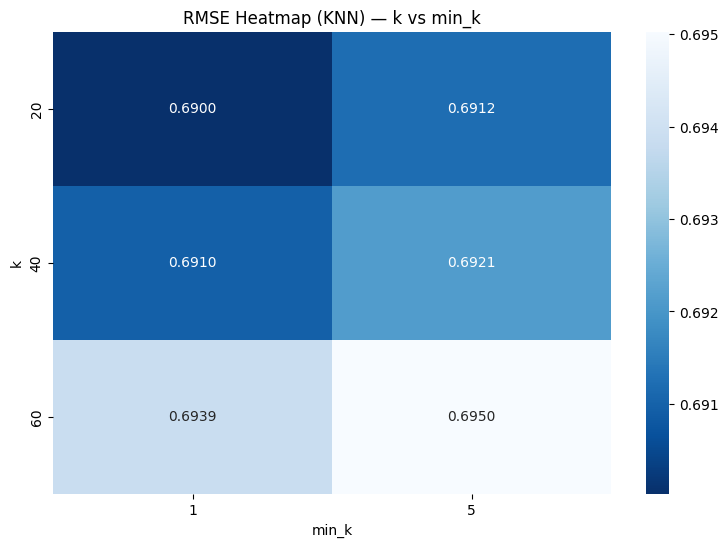

In [ ]:
pivot_table = results_df.pivot_table(
    values='mean_test_rmse',
    index='param_k',
    columns='param_min_k'
)

plt.figure(figsize=(9, 6))
sns.heatmap(
    pivot_table,
    annot=True,
    fmt='.4f',
    cmap='Blues_r'
)

plt.title('RMSE Heatmap (KNN) — k vs min_k')
plt.xlabel('min_k')
plt.ylabel('k')
plt.show()
